In [ ]:
pip install statsmodels pingouin

In [21]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

In [28]:
drug_safety

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0
...,...,...,...,...,...,...,...,...
16098,78,male,Placebo,16,NaN,NaN,Yes,1
16099,78,male,Placebo,2,7.5,4.9,No,0
16100,78,male,Placebo,20,NaN,NaN,Yes,1
16101,78,male,Placebo,4,6.4,4.8,No,0


P-value for adverse effects proportion test: 0.9639333330262475


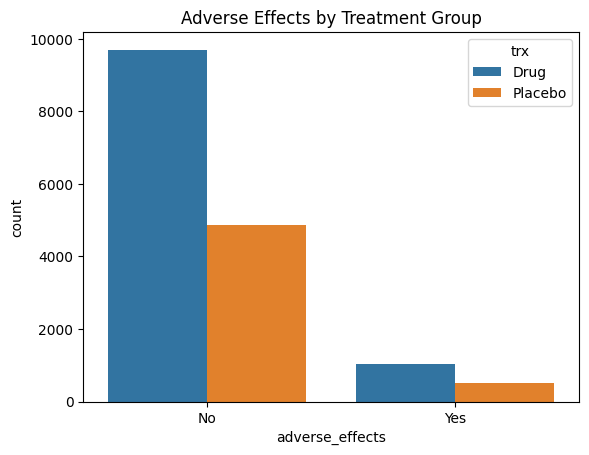

In [38]:
# Qst : the proportion of "adverse effects" characteristics differs significantly between the Drug and Placebo groups ? 

# H0 : p_adverse_in_drug = p_adverse_in_placebo, p are the proportions of individuals experiencing adverse effect in the Drug or Placebo groups

# Test : two-sample proportions z-test

# Count adverse effects in each group
drug_count = drug_safety[drug_safety['trx'] == 'Drug']['adverse_effects'].value_counts().get('Yes', 0)
placebo_count = drug_safety[drug_safety['trx'] == 'Placebo']['adverse_effects'].value_counts().get('Yes', 0)

# Total counts in each group
drug_total = drug_safety[drug_safety['trx'] == 'Drug'].shape[0]
placebo_total = drug_safety[drug_safety['trx'] == 'Placebo'].shape[0]

# Perform two-sample proportions z-test
counts = np.array([drug_count, placebo_count])
nobs = np.array([drug_total, placebo_total])
two_sample_stat, two_sample_p_value = proportions_ztest(counts, nobs)

print("P-value for adverse effects proportion test:", two_sample_p_value)

# Visualize adverse effect proportions
sns.countplot(x='adverse_effects', hue='trx', data=drug_safety)
plt.title("Adverse Effects by Treatment Group")
plt.show()

This high p-value suggests that there is no statistically significant difference in the proportion of adverse effects between the two groups.

In [36]:
(counts/nobs)*100

array([9.54600541, 9.52380952])

P-value for number of adverse effects independence test: 0.6150123339426765


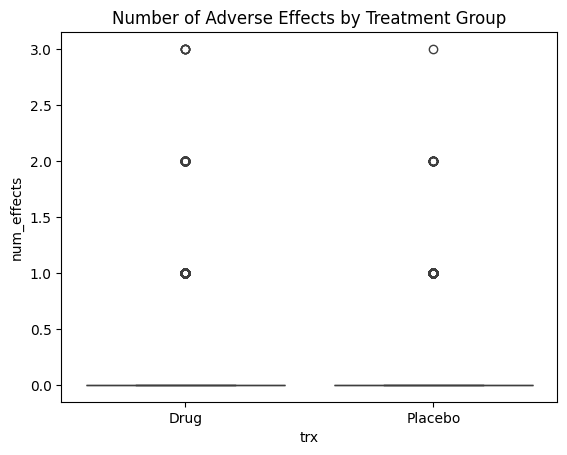

In [26]:
from scipy.stats import chi2_contingency

# Qst : the number of adverse effects is independent of the treatment and control groups

# H0 : trx is independant of num_effects
# Test : chi-squared test

# Create a contingency table for trx and num_effects
contingency_table_num_effects = pd.crosstab(drug_safety['trx'], drug_safety['num_effects'])

# Perform the chi-squared test
chi2_stat, num_effects_p_value, dof, expected = chi2_contingency(contingency_table_num_effects)

print("P-value for number of adverse effects independence test:", num_effects_p_value)

# Visualize number of adverse effects
sns.boxplot(x='trx', y='num_effects', data=drug_safety)
plt.title("Number of Adverse Effects by Treatment Group")
plt.show()

There is no statistically significant association between the treatment group and the number of adverse effects experienced. They are independant.

P-value for age difference test: 0.1403138130413439


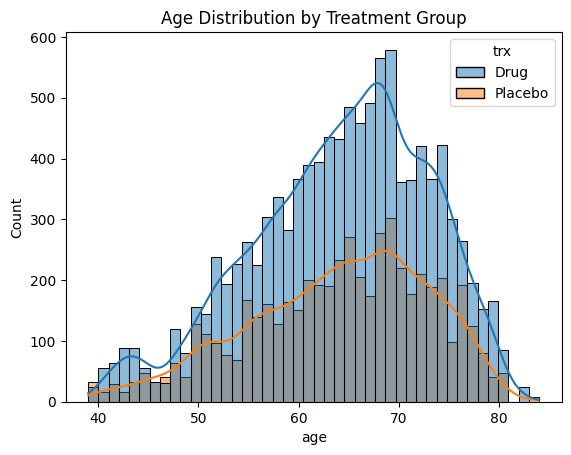

In [39]:
# Qst : there is a significant difference between the ages of the Drug and Placebo groups

# H0 : mean_age_in_drug = mean_age_in_placebo
# Test : t-test test de student

# Perform an independent t-test to compare ages between Drug and Placebo groups
age_group_effects_p_value = pingouin.ttest(drug_safety[drug_safety['trx'] == 'Drug']['age'], 
                                           drug_safety[drug_safety['trx'] == 'Placebo']['age'], 
                                           alternative='two-sided')['p-val'].values[0]

print("P-value for age difference test:", age_group_effects_p_value)

# Visualize age distributions by treatment group
sns.histplot(data=drug_safety, x='age', hue='trx', kde=True)
plt.title("Age Distribution by Treatment Group")
plt.show()

mean of age is the same across two groups

### recall 


1. **Student's t-test**:
   - **Purpose**: To compare the means of a continuous variable (quantitative) between two groups.
   - **Use Case**: When you have two groups (e.g., Drug and Placebo) and want to determine if there is a significant difference in their means for a specific continuous variable (e.g., age).
   - **Assumptions**: Normally distributed data within each group, and ideally similar variances (though the test can be adjusted if variances are unequal).

2. **Chi-squared test**:
   - **Purpose**: To test for independence between two categorical variables.
   - **Use Case**: When you want to know if one categorical variable (e.g., treatment group `trx` with levels Drug and Placebo) is independent of another categorical variable (e.g., `num_effects`, the count of adverse effects, treated as categorical).
   - **Assumptions**: Sufficiently large sample size, with expected frequencies generally greater than 5 for each cell in the contingency table.

3. **Z-test for proportions**:
   - **Purpose**: To compare proportions between two groups.
   - **Use Case**: When you have a binary outcome (e.g., presence or absence of adverse effects) and want to know if the proportion of individuals experiencing this outcome differs between two groups (e.g., Drug and Placebo).
   - **Assumptions**: Large enough sample size for the approximation to the normal distribution to hold (e.g., each group should have at least 10 successes and 10 failures). 